In [314]:
import pandas as pd
import numpy as num_paths
import matplotlib.pyplot as psnrResault
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

In [315]:
df=pd.read_csv("dataTest.csv")

In [316]:
df=pd.DataFrame(df)
df.head()

,host,avgRTT,packetLoss,latency,hopCount,bandwidth,yukOrani,psnr,ssim_first,ssim_second,type,server
0,h1,1898.137,0.0,66,4,3000000,2011.425000,31.225948,0.985150,18.282783,3,h10
1,h2,2240.660,0.0,44,3,3000000,1859.161290,31.225948,0.985150,18.282674,3,h14
2,h3,2196.294,0.0,40,2,3000000,9084.620155,22.700112,0.956348,13.599976,3,h14
3,h4,1298.732,0.0,60,3,3000000,25815.963636,22.301604,0.960533,14.037636,3,h14
4,h5,338.105,0.0,92,4,3000000,37246.273632,22.510259,0.958593,13.829213,3,h10


In [317]:
df.dropna(inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,346.0,1.059861e+03,1.056332e+03,1.529400e+02,3.105077e+02,4.497390e+02,1.926631e+03,4.744949e+03
packetLoss,346.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
latency,346.0,7.903179e+01,6.776688e+01,1.300000e+01,5.300000e+01,7.500000e+01,9.200000e+01,1.035000e+03
hopCount,346.0,3.101156e+00,1.048753e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,346.0,5.130058e+06,2.513239e+06,3.000000e+06,3.000000e+06,5.000000e+06,5.000000e+06,1.000000e+07
yukOrani,346.0,3.101812e+04,2.587809e+04,4.751573e+02,9.766906e+03,2.588607e+04,4.476515e+04,1.770201e+05
psnr,346.0,3.614067e+01,1.641869e+01,1.267172e+01,2.187556e+01,3.033112e+01,5.505260e+01,5.506194e+01
ssim_first,346.0,9.262722e-01,1.241364e-01,5.138590e-01,9.345777e-01,9.849815e-01,9.997650e-01,9.997650e-01
ssim_second,346.0,2.194706e+01,1.247219e+01,3.132379e+00,1.184406e+01,1.823371e+01,3.628266e+01,3.628266e+01
type,346.0,3.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


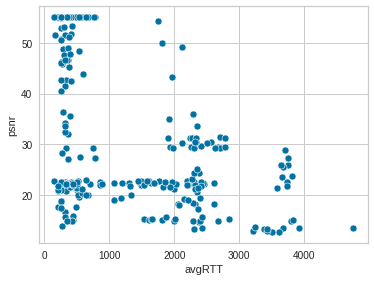

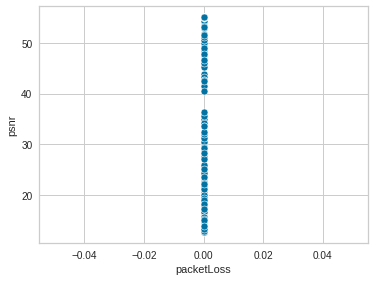

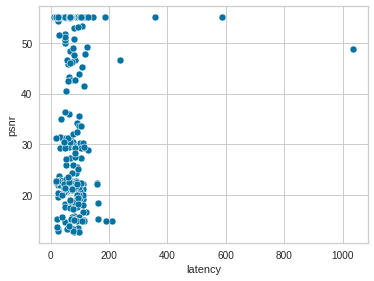

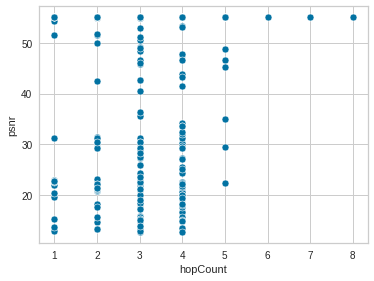

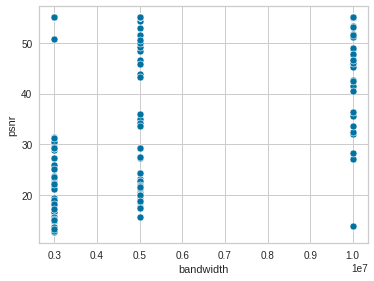

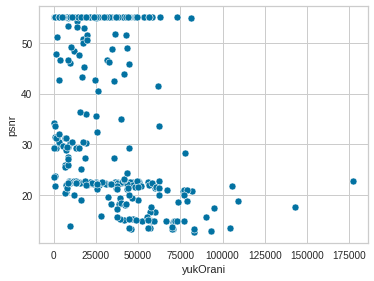

In [318]:
sayisal_veriler=["avgRTT","packetLoss","latency","hopCount","bandwidth","yukOrani"]
for i,deger in enumerate(sayisal_veriler):
    plt.figure(figsize=(20,20))
    ax=plt.subplot(4,3,i+1)
    sns.scatterplot(x=deger,y="psnr",data=df)
    plt.show()

In [319]:
# sns.displot(df)

In [320]:
y=df["ssim_first"]
x=df.drop(["host","ssim_first","ssim_second","type","psnr","server"],axis="columns")
y


0      0.985150
1      0.985150
2      0.956348
3      0.960533
4      0.958593
         ...   
343    0.999765
344    0.999765
345    0.547077
346    0.999659
347    0.999728
Name: ssim_first, Length: 346, dtype: float64

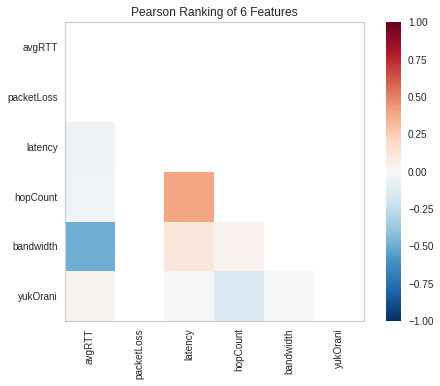

<AxesSubplot:title={'center':'Pearson Ranking of 6 Features'}>

In [321]:
from yellowbrick.features import Rank2D
visualizer=Rank2D(algorithm="pearson")
visualizer.fit(x,y)
visualizer.transform(x)
visualizer.show()

In [322]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,346.0,1.059861e+03,1.056332e+03,1.529400e+02,3.105077e+02,4.497390e+02,1.926631e+03,4.744949e+03
packetLoss,346.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
latency,346.0,7.903179e+01,6.776688e+01,1.300000e+01,5.300000e+01,7.500000e+01,9.200000e+01,1.035000e+03
hopCount,346.0,3.101156e+00,1.048753e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,346.0,5.130058e+06,2.513239e+06,3.000000e+06,3.000000e+06,5.000000e+06,5.000000e+06,1.000000e+07
yukOrani,346.0,3.101812e+04,2.587809e+04,4.751573e+02,9.766906e+03,2.588607e+04,4.476515e+04,1.770201e+05


In [323]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(x,y,test_size=0.5, random_state=42)

In [324]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.4744843292292201


In [325]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.4315943294800135 test: 0.3409344626354954
max_depth : 2 --> score r2 : eğitim:0.7949446521413861 test: 0.6634494370134092
max_depth : 3 --> score r2 : eğitim:0.8855946587809375 test: 0.724193536716759
max_depth : 4 --> score r2 : eğitim:0.9331683320977691 test: 0.749911986099439
max_depth : 5 --> score r2 : eğitim:0.9563881258550985 test: 0.7517780601852144
max_depth : 6 --> score r2 : eğitim:0.9708219810777781 test: 0.7606291791032909
max_depth : 7 --> score r2 : eğitim:0.9691572677843767 test: 0.7598982350869732
max_depth : 8 --> score r2 : eğitim:0.9749969085183257 test: 0.7670872011144056
max_depth : 9 --> score r2 : eğitim:0.9755364415058657 test: 0.7670864340060592
max_depth : 10 --> score r2 : eğitim:0.9704937606283766 test: 0.7593573261350479
max_depth : 11 --> score r2 : eğitim:0.9724614392290983 test: 0.7681983711262117
max_depth : 12 --> score r2 : eğitim:0.9713713659819018 test: 0.7655082833665415
max_depth : 13 --> score r2 : eğitim:0.

In [326]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.7091441746893932
n_neigbors : 2 --> score r2 : eğitim:0.930297043470619 test: 0.7327568558950519
n_neigbors : 3 --> score r2 : eğitim:0.8991937383350144 test: 0.7226339802679749
n_neigbors : 4 --> score r2 : eğitim:0.8925865266627641 test: 0.7215740900866321
n_neigbors : 5 --> score r2 : eğitim:0.867333831413293 test: 0.7180396466458725
n_neigbors : 6 --> score r2 : eğitim:0.8339483204561509 test: 0.6984056416213339
n_neigbors : 7 --> score r2 : eğitim:0.8162504834521548 test: 0.6997314663936174
n_neigbors : 8 --> score r2 : eğitim:0.8068586638009463 test: 0.6866589449183331
n_neigbors : 9 --> score r2 : eğitim:0.8101758924465997 test: 0.6799064088208281
n_neigbors : 10 --> score r2 : eğitim:0.8049185710251067 test: 0.6693338968249424
n_neigbors : 11 --> score r2 : eğitim:0.8092077842196058 test: 0.6711582857757712
n_neigbors : 12 --> score r2 : eğitim:0.8096988482629338 test: 0.6664568719296715
n_neigbors : 13 --> score r2 : eğitim:0.80

In [327]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.3699213133529945 test: 0.24958207518157272
max_depth : 2 --> score r2 : eğitim:0.7162273893428583 test: 0.6080068775773877
max_depth : 3 --> score r2 : eğitim:0.8546132665603596 test: 0.6470973948377617
max_depth : 4 --> score r2 : eğitim:0.9420723497694432 test: 0.6621181855500635
max_depth : 5 --> score r2 : eğitim:0.9803583221581956 test: 0.6538123213763458
max_depth : 6 --> score r2 : eğitim:0.9900267834071691 test: 0.7059401628006611
max_depth : 7 --> score r2 : eğitim:0.9978326523499816 test: 0.6492863605502958
max_depth : 8 --> score r2 : eğitim:0.9990750502853449 test: 0.6558386520473444
max_depth : 9 --> score r2 : eğitim:0.9993263368610164 test: 0.7206207866467067
max_depth : 10 --> score r2 : eğitim:0.9997327202350127 test: 0.634300181853078
max_depth : 11 --> score r2 : eğitim:0.9997981200073741 test: 0.6533123890081928
max_depth : 12 --> score r2 : eğitim:0.9999926298406461 test: 0.6450325673152506
max_depth : 13 --> score r2 : eğitim:

In [328]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.7278795031009182 test: 0.5475463254615585
max_depth : 2 --> score r2 : eğitim:0.938991621966213 test: 0.7071543138602904
max_depth : 3 --> score r2 : eğitim:0.9877031711708673 test: 0.7543314299106985
max_depth : 4 --> score r2 : eğitim:0.9985531611238864 test: 0.7531414125012466
max_depth : 5 --> score r2 : eğitim:0.9999111462760994 test: 0.7249171801446836
max_depth : 6 --> score r2 : eğitim:0.9999931975152659 test: 0.703485731001789
max_depth : 7 --> score r2 : eğitim:0.9999998499859609 test: 0.6672689951829871
max_depth : 8 --> score r2 : eğitim:0.9999999937815067 test: 0.6970901467126083
max_depth : 9 --> score r2 : eğitim:0.9999999990578685 test: 0.7091584640564382


In [329]:
tahminGbr

array([0.99990175, 0.99874376, 0.51388828, 0.74729061, 0.99968304,
       0.94688732, 0.92716827, 0.99894902, 0.66636776, 0.99770189,
       0.99916307, 0.99986481, 0.72360621, 0.65886447, 0.99926123,
       0.9997623 , 0.91978665, 0.65324203, 0.91020847, 0.99976357,
       0.74729061, 0.98491611, 0.99914297, 0.95707904, 0.9365245 ,
       0.99956905, 0.99942806, 0.99843183, 0.95108311, 0.98696117,
       0.7712299 , 0.99974189, 0.99471347, 0.81990713, 0.98387795,
       0.99936947, 0.99980663, 0.99657671, 0.96016796, 0.99569778,
       0.99966245, 0.99983033, 0.94506765, 0.99973885, 0.95607273,
       0.89711331, 0.77122784, 0.88920182, 0.97012069, 0.94910226,
       0.99975835, 0.81041494, 0.92716912, 0.95245107, 0.96034772,
       0.99979438, 0.94251441, 0.94267242, 0.99890965, 0.99976291,
       0.98002967, 0.88718954, 0.95793017, 0.53365286, 0.94476593,
       0.89709991, 0.99976658, 0.9997583 , 0.95918816, 0.99976897,
       0.88752073, 0.98054341, 0.99975874, 0.99974897, 0.95495

In [330]:
yTest

109    0.999765
159    0.999765
279    0.628608
210    0.661575
321    0.991107
         ...   
221    0.940666
113    0.999765
276    0.956484
209    0.786674
118    0.986783
Name: ssim_first, Length: 173, dtype: float64

In [331]:
yTrain

320    0.998213
335    0.999765
245    0.931347
325    0.998369
165    0.940439
         ...   
189    0.942673
71     0.999765
107    0.999756
271    0.534366
103    0.999765
Name: ssim_first, Length: 173, dtype: float64

In [332]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
XTrain[sayisal_veriler]=scaler.fit_transform(XTrain[sayisal_veriler])
XTest[sayisal_veriler]=scaler.transform(XTest[sayisal_veriler])

In [333]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.47448432922919415


In [334]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.6691778854965011
n_neigbors : 2 --> score r2 : eğitim:0.9272515698751637 test: 0.7141290686973709
n_neigbors : 3 --> score r2 : eğitim:0.8873151052423128 test: 0.6927180853908638


n_neigbors : 4 --> score r2 : eğitim:0.8411485248228334 test: 0.6744797434553358
n_neigbors : 5 --> score r2 : eğitim:0.8102500618362982 test: 0.6620721003489523
n_neigbors : 6 --> score r2 : eğitim:0.7936032223159623 test: 0.6494133872037258
n_neigbors : 7 --> score r2 : eğitim:0.8057200175874433 test: 0.6552164066460908
n_neigbors : 8 --> score r2 : eğitim:0.7956570947680314 test: 0.652745808571593
n_neigbors : 9 --> score r2 : eğitim:0.7804414164402588 test: 0.652477435771008
n_neigbors : 10 --> score r2 : eğitim:0.768643894251046 test: 0.6457033544221218
n_neigbors : 11 --> score r2 : eğitim:0.7526013850653398 test: 0.6372543535819646
n_neigbors : 12 --> score r2 : eğitim:0.7534237595842708 test: 0.626159168737491
n_neigbors : 13 --> score r2 : eğitim:0.7475887627864444 test: 0.6092857521285772
n_neigbors : 14 --> score r2 : eğitim:0.7419904885098927 test: 0.6056199407146632
n_neigbors : 15 --> score r2 : eğitim:0.7342712084070079 test: 0.5968723554946251
n_neigbors : 16 --> score 

In [335]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,bootstrap=True,criterion="friedman_mse",max_features='log2',max_leaf_nodes=None,n_estimators=100,n_jobs=1,random_state=42)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.41256328020704613 test: 0.34399604080872703
max_depth : 2 --> score r2 : eğitim:0.6387421151109278 test: 0.5270210877378106
max_depth : 3 --> score r2 : eğitim:0.7712509659718563 test: 0.614661878747228
max_depth : 4 --> score r2 : eğitim:0.8646663430577229 test: 0.6827826611235276
max_depth : 5 --> score r2 : eğitim:0.9246914643584841 test: 0.7157780080905478
max_depth : 6 --> score r2 : eğitim:0.9391954645913588 test: 0.7204792556008022
max_depth : 7 --> score r2 : eğitim:0.956847123686122 test: 0.7394165370091214
max_depth : 8 --> score r2 : eğitim:0.9670890420765049 test: 0.7424302541231902
max_depth : 9 --> score r2 : eğitim:0.9665652086243411 test: 0.7375726311504016
max_depth : 10 --> score r2 : eğitim:0.9685999613387276 test: 0.7389955649439275
max_depth : 11 --> score r2 : eğitim:0.9676770399982593 test: 0.7377895017473177
max_depth : 12 --> score r2 : eğitim:0.9661870657279603 test: 0.7374993737635561
max_depth : 13 --> score r2 : eğitim:

In [336]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.3699213133529945 test: 0.2495820751815725
max_depth : 2 --> score r2 : eğitim:0.7162273893428582 test: 0.6080068775773877
max_depth : 3 --> score r2 : eğitim:0.8546132665603596 test: 0.6470973948377617
max_depth : 4 --> score r2 : eğitim:0.9420723497694432 test: 0.6631169627527969
max_depth : 5 --> score r2 : eğitim:0.9803583221581956 test: 0.6940950770623564
max_depth : 6 --> score r2 : eğitim:0.9900267834071691 test: 0.6955486439699761
max_depth : 7 --> score r2 : eğitim:0.9978326523499816 test: 0.6827072632166855
max_depth : 8 --> score r2 : eğitim:0.9990750502853449 test: 0.6548318132743595
max_depth : 9 --> score r2 : eğitim:0.9993263368610164 test: 0.6942053920510076
max_depth : 10 --> score r2 : eğitim:0.9997327202350127 test: 0.6704535929852264
max_depth : 11 --> score r2 : eğitim:0.9997981200073741 test: 0.6746737990375528
max_depth : 12 --> score r2 : eğitim:0.9999926298406461 test: 0.6913339599381559
max_depth : 13 --> score r2 : eğitim:

In [337]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.7278795031009182 test: 0.5475463254615588
max_depth : 2 --> score r2 : eğitim:0.938991621966213 test: 0.7074491111012875
max_depth : 3 --> score r2 : eğitim:0.9877031711708673 test: 0.7532475575515202
max_depth : 4 --> score r2 : eğitim:0.9985531611238864 test: 0.7527436572788082
max_depth : 5 --> score r2 : eğitim:0.9999111462760994 test: 0.72124921451641
max_depth : 6 --> score r2 : eğitim:0.9999931975152659 test: 0.6983630002098484
max_depth : 7 --> score r2 : eğitim:0.9999998611584637 test: 0.6822336573723463
max_depth : 8 --> score r2 : eğitim:0.9999999937815067 test: 0.7083701988340644
max_depth : 9 --> score r2 : eğitim:0.9999999990578685 test: 0.7104930427901714
